 XOR Problem Training on Tensorflow
 ==================================

Using one hidden layer with width equals to 3, and a `softplus` activate function in the 
hidden layer and `sigmoid` activate function in output layer.The loss function is defined 
as `sigmoid cross entropy with logits`. And the optimizer is `gradient descent`. Also 
different activate functions are compared with the final prediction outputs and loss 
function values.
The details of the codes are shown below:

--------------------------------------------

## Step 1: import packages

In [1]:
#!/usr/bin/python
# coding:utf-8
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Step 2: define input and output label 
`placeholder` is used to annouce data without telling the specific values. Since only four kind of combinations of two bool values. Denote X=[[0, 0], [0, 1], [1, 0], [1, 1]], so X's shape is (4, 2). While for each combination of X, Y has to be labeled 1 or 0. So Y's shape is (4, 1).

In [3]:
data = tf.placeholder(tf.float32, shape=(4, 2))
label = tf.placeholder(tf.float32, shape=(4, 1))

## Step 3: define neuro net layers
Only two-layer network can solve the nonlinear problem. At first let the hidden layer contain only two nodes and adding bias to see the performance. Also, activate function mapping a discrete number into continuous number should be used. `sigmoid` is a first choice here.

In [15]:
with tf.variable_scope('layer1', reuse=True) as scope1:
    weight = tf.get_variable(name="weight", shape=(2, 2))
    bias = tf.get_variable(name="bias", shape=(2, ))
    x = tf.nn.sigmoid(tf.matmul(data, weight) + bias)

with tf.variable_scope('layer2', reuse=True) as scope2:
    weight = tf.get_variable(name="weight", shape=(2, 1))
    bias = tf.get_variable(name="bias", shape=(1,))
    x = tf.matmul(x, weight) + bias

## Step 4: define optimizer, loss function and other parameters
* optimizer: gradient descent
* loss function: sigmoid cross entropy with logits
* learning rate: only define a placeholder here
* predicts: another sigmoid transformation from the output layer input $Wx^T+b$

In [5]:
preds = tf.nn.sigmoid(x)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=label, logits=x))
learning_rate = tf.placeholder(tf.float32)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

## Step 5: run the training session
$\bigoplus$ will tell how to give X and coresponding true Y label. But here just use tensorflow to randomly initialize all parameters including $W^{(1)}$ and $W^{(2)}$ in the two layers. Since sigmoid will be saturated when $Wx^T+b$ has a very large absolute value, the gradient of the loss function is very small no matter the sign of $z=Wx^T+b$ is correct. So the learning rate to control the speed or the step length should be decrease along with the decaying of the gradient. Choose number of step to be 10000. And see the optimizing process

In [16]:
train_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_label = np.array([[0], [1], [1], [0]])
loss_val = []

with tf.Session() as session1:
    session1.run(tf.global_variables_initializer())
    for step in range(10001):
        if step < 3000:
            lr = 1
        elif step < 6000:
            lr = 0.1
        else:
            lr = 0.01
        _, l, pred = session1.run([optimizer, loss, preds],
                                 feed_dict={data: train_data,
                                            label: train_label,
                                            learning_rate: lr})
        loss_val.append([step, l])
        if not step % 2000:
            print('Step:{} -> Loss:{} -> Predictions{}'.format(step, l, pred))

Step:0 -> Loss:0.8330576419830322 -> Predictions[[ 0.77668262]
 [ 0.74938148]
 [ 0.73568475]
 [ 0.70992303]]
Step:2000 -> Loss:0.005686067510396242 -> Predictions[[ 0.00548934]
 [ 0.99498749]
 [ 0.9925229 ]
 [ 0.00469841]]
Step:4000 -> Loss:0.0034062867052853107 -> Predictions[[ 0.0032804 ]
 [ 0.99698359]
 [ 0.99551803]
 [ 0.00282239]]
Step:6000 -> Loss:0.00317379180341959 -> Predictions[[ 0.00305541]
 [ 0.99718839]
 [ 0.99582338]
 [ 0.00263065]]
Step:8000 -> Loss:0.0031515881419181824 -> Predictions[[ 0.00303387]
 [ 0.99720746]
 [ 0.99585235]
 [ 0.00261167]]
Step:10000 -> Loss:0.0031295367516577244 -> Predictions[[ 0.00301248]
 [ 0.99722642]
 [ 0.99588096]
 [ 0.00259284]]


Finally see the loss function changes along with steps:

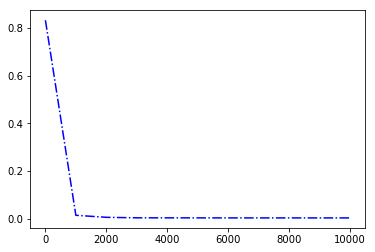

In [17]:
    loss_val = list(zip(*loss_val))
    ii = range(0,10001,1000)
    plt.plot(np.array(loss_val[0])[ii], np.array(loss_val[1])[ii], "-.b", label="loss")

## Step 6: change activate function and repeat
Now use `relu` as the active function and observe its performance

Step:0 -> Loss:0.7216030359268188 -> Predictions[[ 0.62117428]
 [ 0.65270662]
 [ 0.57382947]
 [ 0.60689664]]
Step:2000 -> Loss:0.006413618102669716 -> Predictions[[ 0.00748902]
 [ 0.99432474]
 [ 0.994165  ]
 [ 0.0065721 ]]
Step:4000 -> Loss:0.0036590006202459335 -> Predictions[[ 0.00427587]
 [ 0.99674135]
 [ 0.99669468]
 [ 0.00376913]]
Step:6000 -> Loss:0.003392611164599657 -> Predictions[[ 0.00396482]
 [ 0.99697709]
 [ 0.99693751]
 [ 0.00349689]]
Step:8000 -> Loss:0.0033687071409076452 -> Predictions[[ 0.00393658]
 [ 0.99699759]
 [ 0.99695945]
 [ 0.00347225]]
Step:10000 -> Loss:0.00334510812535882 -> Predictions[[ 0.00390853]
 [ 0.99701786]
 [ 0.99698013]
 [ 0.00344724]]


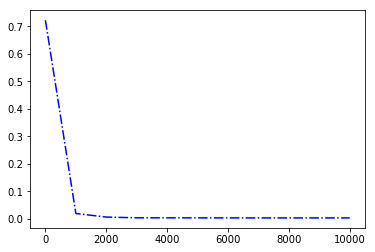

In [22]:
with tf.variable_scope('layer1', reuse=True) as scope1:
    weight = tf.get_variable(name="weight", shape=(2, 2))
    bias = tf.get_variable(name="bias", shape=(2, ))
    x = tf.nn.relu(tf.matmul(data, weight) + bias)  #  use relu

with tf.variable_scope('layer2', reuse=True) as scope2:
    weight = tf.get_variable(name="weight", shape=(2, 1))
    bias = tf.get_variable(name="bias", shape=(1,))
    x = tf.matmul(x, weight) + bias
loss_val = []

with tf.Session() as session2:
    session2.run(tf.global_variables_initializer())
    for step in range(10001):
        if step < 3000:
            lr = 1
        elif step < 6000:
            lr = 0.1
        else:
            lr = 0.01
        _, l, pred = session2.run([optimizer, loss, preds],
                                 feed_dict={data: train_data,
                                            label: train_label,
                                            learning_rate: lr})
        loss_val.append([step, l])
        if not step % 2000:
            print('Step:{} -> Loss:{} -> Predictions{}'.format(step, l, pred))
    loss_val = list(zip(*loss_val))
    ii = range(0,10001,1000)
    plt.plot(np.array(loss_val[0])[ii], np.array(loss_val[1])[ii], "-.b", label="loss")

The output seems equally close to the true value of Y.

## Step 7: extend the width of hidden layer to 3
Use activate function of `softplus` and 3 nodes hidden layer.

Step:0 -> Loss:0.7402983903884888 -> Predictions[[ 0.40322587]
 [ 0.58969802]
 [ 0.53222287]
 [ 0.72366446]]
Step:2000 -> Loss:0.001349485944956541 -> Predictions[[  3.66075663e-04]
 [  9.99196231e-01]
 [  9.99198377e-01]
 [  3.41993035e-03]]
Step:4000 -> Loss:0.0007112563471309841 -> Predictions[[  1.96797540e-04]
 [  9.99574482e-01]
 [  9.99576271e-01]
 [  1.79724977e-03]]
Step:6000 -> Loss:0.0006474719848483801 -> Predictions[[  1.80565228e-04]
 [  9.99611318e-01]
 [  9.99612987e-01]
 [  1.63210044e-03]]
Step:8000 -> Loss:0.000641752383671701 -> Predictions[[  1.78746704e-04]
 [  9.99614716e-01]
 [  9.99615669e-01]
 [  1.61727960e-03]]
Step:10000 -> Loss:0.0006360916886478662 -> Predictions[[  1.76955073e-04]
 [  9.99618411e-01]
 [  9.99618530e-01]
 [  1.60293351e-03]]


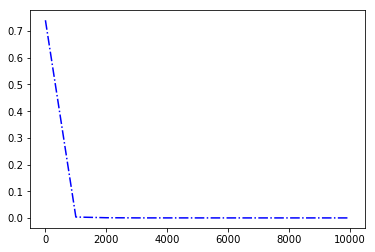

In [27]:
with tf.variable_scope('layer1', reuse=True) as scope1:
    weight11 = tf.get_variable(name="weight11", shape=(2, 3))
    bias11 = tf.get_variable(name="bias11", shape=(3, ))  # use 3 nodes in hidden layer
    x = tf.nn.softplus(tf.matmul(data, weight11) + bias11)  

with tf.variable_scope('layer2', reuse=True) as scope2:
    weight12 = tf.get_variable(name="weight12", shape=(3, 1))
    bias12 = tf.get_variable(name="bias12", shape=(1,))
    x = tf.matmul(x, weight12) + bias12
loss_val = []
preds = tf.nn.sigmoid(x)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=label, logits=x))
learning_rate = tf.placeholder(tf.float32)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
with tf.Session() as session3:
    session3.run(tf.global_variables_initializer())
    for step in range(10001):
        if step < 3000:
            lr = 1
        elif step < 6000:
            lr = 0.1
        else:
            lr = 0.01
        _, l, pred = session3.run([optimizer, loss, preds],
                                 feed_dict={data: train_data,
                                            label: train_label,
                                            learning_rate: lr})
        loss_val.append([step, l])
        if not step % 2000:
            print('Step:{} -> Loss:{} -> Predictions{}'.format(step, l, pred))
    loss_val = list(zip(*loss_val))
    ii = range(0,10001,1000)
    plt.plot(np.array(loss_val[0])[ii], np.array(loss_val[1])[ii], "-.b", label="loss")

A little bit confusing, `softplus` outperform `sigmoid` much better when the nodes of network is extended. If one step further, use sigmoid with 3 nodes in hidden layer. The improvement of extension of hidden layer is not that obvious when using `sigmoid` as activate function compared with `softplus`.

Step:0 -> Loss:1.1650948524475098 -> Predictions[[ 0.88055176]
 [ 0.87456262]
 [ 0.90373427]
 [ 0.8997668 ]]
Step:2000 -> Loss:0.004518677480518818 -> Predictions[[ 0.00494402]
 [ 0.99456489]
 [ 0.99628687]
 [ 0.00394065]]
Step:4000 -> Loss:0.0025592688471078873 -> Predictions[[ 0.00280129]
 [ 0.99686253]
 [ 0.99796653]
 [ 0.00225129]]
Step:6000 -> Loss:0.0023706930223852396 -> Predictions[[ 0.00259487]
 [ 0.99708742]
 [ 0.99812382]
 [ 0.00208762]]
Step:8000 -> Loss:0.002353221643716097 -> Predictions[[ 0.00257421]
 [ 0.99710578]
 [ 0.99813819]
 [ 0.00207131]]
Step:10000 -> Loss:0.002335874829441309 -> Predictions[[ 0.00255371]
 [ 0.99712402]
 [ 0.99815255]
 [ 0.00205511]]


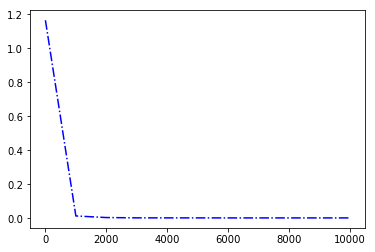

In [28]:
with tf.variable_scope('layer1', reuse=True) as scope1:
    weight11 = tf.get_variable(name="weight11", shape=(2, 3))
    bias11 = tf.get_variable(name="bias11", shape=(3, ))  # use 3 nodes in hidden layer
    x = tf.nn.sigmoid(tf.matmul(data, weight11) + bias11)  

with tf.variable_scope('layer2', reuse=True) as scope2:
    weight12 = tf.get_variable(name="weight12", shape=(3, 1))
    bias12 = tf.get_variable(name="bias12", shape=(1,))
    x = tf.matmul(x, weight12) + bias12
loss_val = []
preds = tf.nn.sigmoid(x)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=label, logits=x))
learning_rate = tf.placeholder(tf.float32)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
with tf.Session() as session3:
    session3.run(tf.global_variables_initializer())
    for step in range(10001):
        if step < 3000:
            lr = 1
        elif step < 6000:
            lr = 0.1
        else:
            lr = 0.01
        _, l, pred = session3.run([optimizer, loss, preds],
                                 feed_dict={data: train_data,
                                            label: train_label,
                                            learning_rate: lr})
        loss_val.append([step, l])
        if not step % 2000:
            print('Step:{} -> Loss:{} -> Predictions{}'.format(step, l, pred))
    loss_val = list(zip(*loss_val))
    ii = range(0,10001,1000)
    plt.plot(np.array(loss_val[0])[ii], np.array(loss_val[1])[ii], "-.b", label="loss")